# Лабораторная работа №1 
# "Градиентный спуск и его модификации"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
# Реализация классического градиентного спуска
class GradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
        self.learning_rate = learning_rate  
        self.max_iter = max_iter  
        self.tolerance = tolerance  

    def optimize(self, func, grad_func, initial_point):
        point = np.array(initial_point)
        history = [point]

        for _ in range(self.max_iter):
            gradient = grad_func(point)  
            new_point = point - self.learning_rate * gradient  

            history.append(new_point)  
            if np.linalg.norm(new_point - point) < self.tolerance:
                break
            point = new_point  

        return point, history 

In [3]:
# Моментная модификация
class MomentumGradientDescent(GradientDescent):
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6, momentum=0.9):
        super().__init__(learning_rate, max_iter, tolerance)
        self.momentum = momentum  
        self.velocity = None  

    def optimize(self, func, grad_func, initial_point):
        point = np.array(initial_point)
        self.velocity = np.zeros_like(point)  
        history = [point]  

        for _ in range(self.max_iter):
            gradient = grad_func(point)
            self.velocity = self.momentum * self.velocity - self.learning_rate * gradient
            new_point = point + self.velocity 

            history.append(new_point)  
            if np.linalg.norm(new_point - point) < self.tolerance:
                break
            point = new_point 

        return point, history  

In [4]:
# Адаптивная модификация
class AdamGradientDescent(GradientDescent):
    def __init__(self, learning_rate=0.01, max_iter=1000, tolerance=1e-6, beta1=0.9, beta2=0.999, epsilon=1e-8):
        super().__init__(learning_rate, max_iter, tolerance)
        self.beta1 = beta1  
        self.beta2 = beta2  
        self.epsilon = epsilon  
        self.m = None  
        self.v = None  
        self.t = 0 

    def optimize(self, func, grad_func, initial_point):
        point = np.array(initial_point)
        self.m = np.zeros_like(point) 
        self.v = np.zeros_like(point)  
        history = [point]  

        for _ in range(self.max_iter):
            self.t += 1 
            gradient = grad_func(point)  

            self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
            self.v = self.beta2 * self.v + (1 - self.beta2) * (gradient ** 2)

            m_hat = self.m / (1 - self.beta1 ** self.t)
            v_hat = self.v / (1 - self.beta2 ** self.t)

            point -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
            history.append(point)  

            if np.linalg.norm(gradient) < self.tolerance:
                break

        return point, history  


In [5]:
# Визуализация функции 
def plot_function_3d(func, optimized_point, history):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y))

    ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='viridis', alpha=0.7)

    history = np.array(history)
    ax.plot(history[:, 0], history[:, 1], func((history[:, 0], history[:, 1])), 'ro-', markersize=3, label='Путь оптимизации')

    ax.scatter(optimized_point[0], optimized_point[1], func(optimized_point), color='g', s=100, label='Оптимизированная точка')

    ax.view_init(30, -130)

    ax.legend()

    ax.set_title('Трехмерная визуализация оптимизации градиентного спуска')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Значение функции')
    plt.show()

In [6]:
def test_optimization_pipeline(opt_method, func, grad_func, initial_point, true_min):
    optimized_point, history = opt_method.optimize(func, grad_func, initial_point)
    error = np.linalg.norm(optimized_point - true_min)

    return optimized_point, error, history

In [7]:
def symbolic_gradient(func_str):
    x, y = symbols('x y') 
    func = eval(func_str) 
    grad_x = diff(func, x) 
    grad_y = diff(func, y) 
    grad_func = lambdify((x, y), (grad_x, grad_y), 'numpy')
    return grad_func  

In [8]:
# Численная аппроксимация градиента
def numerical_gradient(func):
    def grad_func(point, h=1e-5):
        grad = np.zeros_like(point)  
        for i in range(point.size):
            X_inc = point.copy()
            X_inc[i] += h  
            X_dec = point.copy()
            X_dec[i] -= h  
            grad[i] = (func(X_inc) - func(X_dec)) / (2*h)
        return grad  
    return grad_func  

# Применение алгоритма градиентного спуска для функции Матьяса

Оптимизированная точка: [-0.00181693 -0.00181693], Ошибка: 0.0025695283964185423


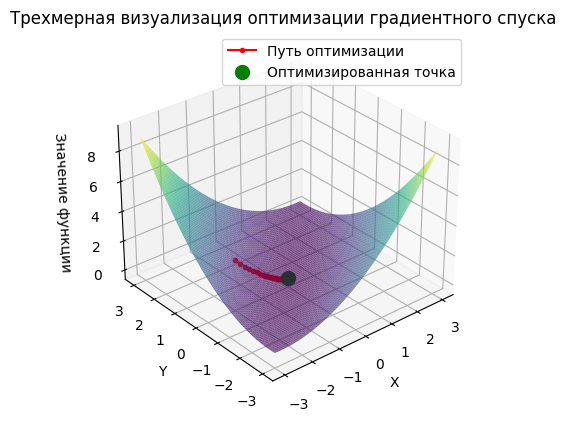

In [9]:
# Пример функции и её аналитического градиента
def func(point):
    x, y = point
    return 0.26*(x*x + y*y) - 0.48*x*y  

def grad_func(point):
    x, y = point
    return np.array([0.52 * x - 0.48 * y, 0.52 * y - 0.48 * x])

# Аналитический минимум
true_min = np.array([0, 0])

# Тестирование
initial_point = np.array([-1.2, 1.0])
gd = GradientDescent(learning_rate=0.1)
momentum_gd = MomentumGradientDescent(learning_rate=0.1)
adam_gd = AdamGradientDescent(learning_rate=0.1)

optimized_point, error, history = test_optimization_pipeline(gd, func, grad_func, initial_point, true_min)
print(f"Оптимизированная точка: {optimized_point}, Ошибка: {error}")

# Визуализация
plot_function_3d(func, optimized_point, history)

# Применение алгоритма градиентного спуска для функции Розенброка, когда функция ограничена кубической и прямой

Оптимизированная точка: [0.32469697 0.10233834], Ошибка: 1.1233123544976056


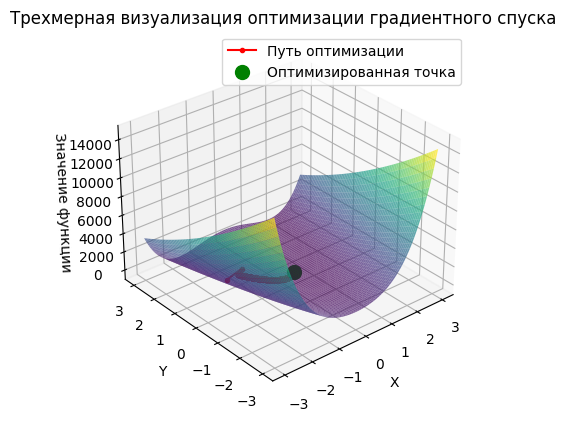

In [10]:
def func2(point):
    x, y = point
    return (1 - x)**2 + 100 * (y - x**2)**2  

def grad_func2(point):
    x, y = point
    return np.array([-2 * (1 - x) - 400 * x * (y - x**2), 200 * (y - x**2)])

# Аналитический минимум
true_min = np.array([1, 1])

# Тестирование
initial_point = np.array([-1.5, 1.0])  # Начальная точка ближе к минимуму
gd = GradientDescent(learning_rate=0.001)  # Уменьшенный шаг обучения
momentum_gd = MomentumGradientDescent(learning_rate=0.001)
adam_gd = AdamGradientDescent(learning_rate=0.001)

optimized_point, error, history = test_optimization_pipeline(gd, func2, grad_func2, initial_point, true_min)
print(f"Оптимизированная точка: {optimized_point}, Ошибка: {error}")

# Визуализация
plot_function_3d(func2, optimized_point, history)